# NYC Airbnb Bookings
### Python Final Project

#### Akhila and Shivani Dedhia

In [41]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings

In [9]:
url="https://raw.githubusercontent.com/shivanidedhia/Airbnb_listing_in_NYC/main/AB_NYC_2019.csv"


In [11]:
s=requests.get(url).content
airbnb=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [12]:
# understanding the first few coloumns of the Airbnb Data set
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
# number of rows in the Airbnb Datasets
len(airbnb)

48895

In [14]:
# type of object in each coloumn
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Cleaning the Data

In [20]:
# Understanding the empty cells in each col. 
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Last_review and reviews_per_month have the most amount of empty col. which makes sense since it is an optional field

In [22]:
# Dropping coloumns which are not as significant
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [25]:
# All NaN values in 'reviews_per_month' are replaced with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

#### Only name coloumn now has 16 missing values

In [26]:
# Which neighbourhoods are present in the dataset?
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#### As suspected, all 5 boroughs of New York City are present in the Airbnb NYC Dataset

In [27]:
# What type of rooms are available on Airbnb?
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#### Private Room, Entire home/apt, and Shared room are all the choices available while booking an Airbnb

### Exploring and Visualizing the Data

In [76]:
#setting figure size for visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [29]:
# Which hosts have had the most amount of bookings?
hosts_w_most_bookings = airbnb.host_id.value_counts()

In [38]:
# Top 5 hosts with the highest Airbnb bookings
top_5 = hosts_w_most_bookings.head()
top_5

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64

In [99]:
top_host=pd.DataFrame(top_5)
top_host.reset_index(inplace=True)
top_host.rename(columns={'index':'Host_ID', 'host_id':'Booking_Count'}, inplace=True)
top_host

,Host_ID,Booking_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96


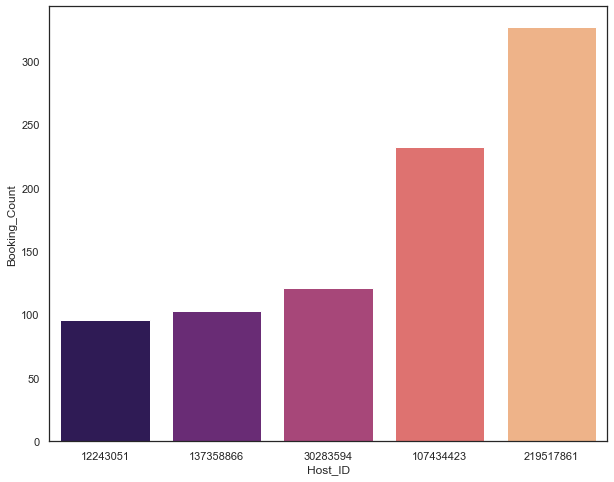

In [113]:
sns.barplot(x="Host_ID", 
            y="Booking_Count", 
            data=top_host,
            order=top_host.sort_values('Booking_Count').Host_ID,
            palette="magma")

Text(0.5, 1.0, 'Listings by Boroughs')

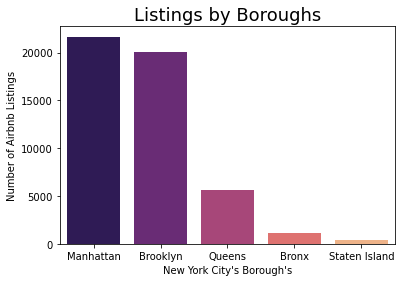

In [57]:
sns.countplot(x = 'neighbourhood_group',
              data = airbnb,
              order = airbnb['neighbourhood_group'].value_counts().index,
              palette="magma")
plt.xlabel("New York City's Borough's", size=10)
plt.ylabel("Number of Airbnb Listings", size=10)
plt.title("Listings by Boroughs", size=18)

#### Manhattan has the most amount of bookings followed by Brooklyn which is intuitive

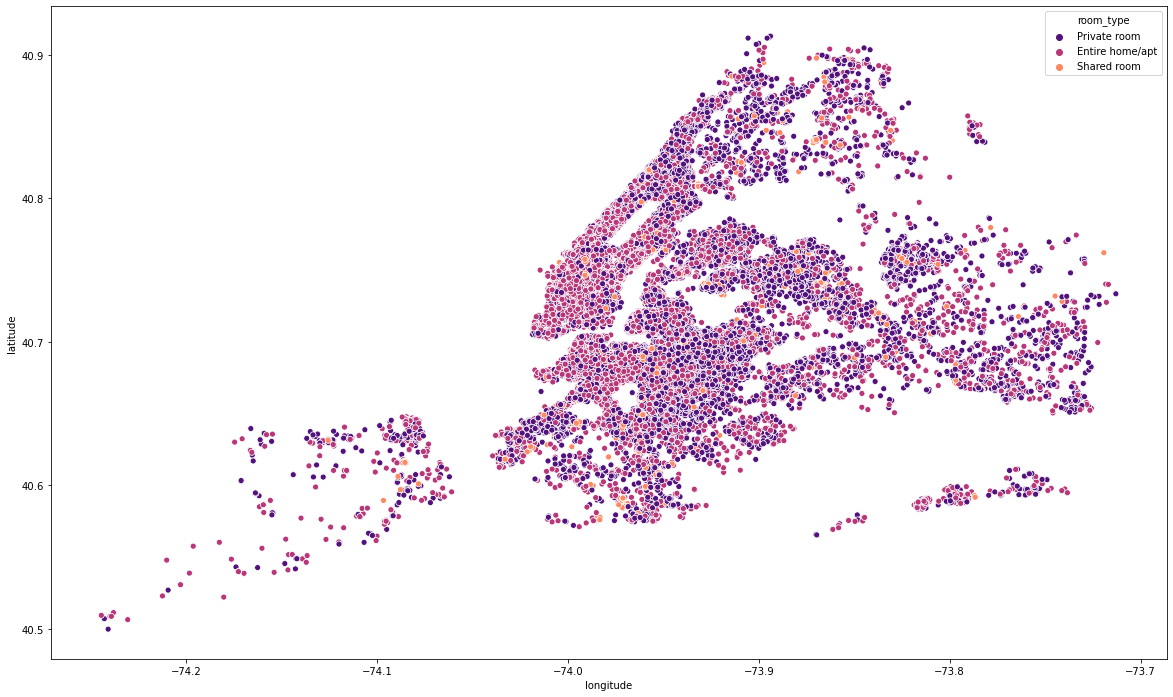

In [72]:
plt.figure(figsize=(20,12))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue= airbnb.room_type, palette="magma")

#### Creating a violin plot to show the price distribution
###### Prices had to be normalized so, prices above 500 are removed for the sake of the visualisation

In [85]:
price_less_500 = airbnb[airbnb.price < 500]

Text(0.5, 1.0, 'Price by Neighborhood')

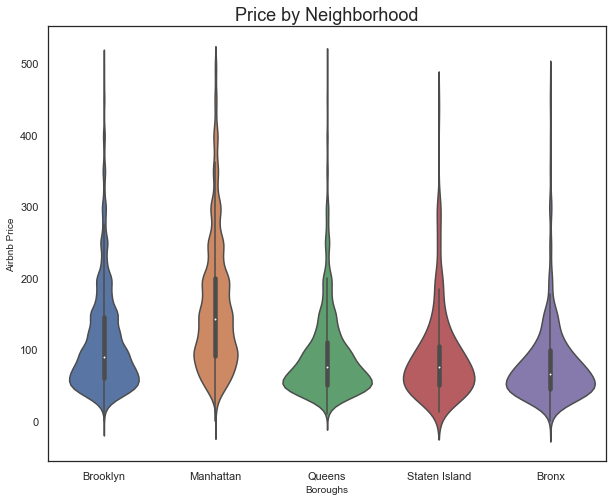

In [86]:
sns.violinplot(data=price_less_500, x='neighbourhood_group', y='price')
plt.xlabel("Boroughs", size=10)
plt.ylabel("Airbnb Price", size=10)
plt.title("Price by Neighborhood", size=18)